In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv('DIABETES.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
Correlation = data.corr()
Correlation['Outcome'].abs().sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [28]:
# We select atributes having corr.coeff larger than 0.10
dataset = data[['Glucose', 'BMI', 'Age', 'Pregnancies', \
                'DiabetesPedigreeFunction', 'Insulin', 'Outcome']]
dataset.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1


In [29]:
X = dataset.iloc[:, :-1]    # independent varible
y = dataset.iloc[:, -1]     # dependent variable

X.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,148,33.6,50,6,0.627,0
1,85,26.6,31,1,0.351,0
2,183,23.3,32,8,0.672,0
3,89,28.1,21,1,0.167,94
4,137,43.1,33,0,2.288,168


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print (X[:10])

[[ 0.84832379  0.20401277  1.4259954   0.63994726  0.46849198 -0.69289057]
 [-1.12339636 -0.68442195 -0.19067191 -0.84488505 -0.36506078 -0.69289057]
 [ 1.94372388 -1.10325546 -0.10558415  1.23388019  0.60439732 -0.69289057]
 [-0.99820778 -0.49404308 -1.04154944 -0.84488505 -0.92076261  0.12330164]
 [ 0.5040552   1.4097456  -0.0204964  -1.14185152  5.4849091   0.76583594]
 [-0.15318486 -0.81134119 -0.27575966  0.3429808  -0.81807858 -0.69289057]
 [-1.34247638 -0.12597727 -0.61611067 -0.25095213 -0.676133    0.07120427]
 [-0.184482    0.41977549 -0.36084741  1.82781311 -1.02042653 -0.69289057]
 [ 2.38188392 -0.18943689  1.68125866 -0.54791859 -0.94794368  4.02192191]
 [ 0.12848945 -4.06047387  1.76634642  1.23388019 -0.7244549  -0.69289057]]


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=0)

# The following is an example of using LR from Scikit-Learn

In [32]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

Predicted Value,0,1
Target Value,,
0,97,10
1,19,28


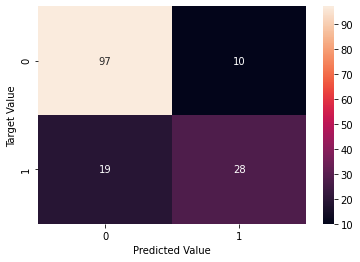

In [34]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Target Value'], colnames = ['Predicted Value'])
sns.heatmap(confusion_matrix, annot=True)
confusion_matrix

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



# Give you accuracy 81%...NOT BAD AT ALL

# Now we apply an approach from probability perspective, meaning we are goig to use MLE

First we need to create a sigmoid function.  The code for this is pretty simple.

In [36]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [37]:
# and the cost/loss/objective function based on MLE
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

Now we need to do some setup, similar to what we did in exercise 1 for linear regression.

In [38]:
# add a ones column - this makes the matrix multiplication work out easier
dataset.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = dataset.shape[1]
X = dataset.iloc[:,0:cols-1]
y = dataset.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(7)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
X_train.shape, theta.shape, y_train.shape

((614, 7), (7,), (614, 1))

Now let's compute the cost for our initial solution (0 values for theta).

In [41]:
cost(theta, X_train, y_train)

0.6931471805599453

Looks good.  Next we need a function to compute the gradient (parameter updates) given our training data, labels, and some parameters theta.

In [42]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

Note that we don't actually perform gradient descent in this function - we just compute a single gradient step.  In the exercise, an Octave function called "fminunc" is used to optimize the parameters given functions to compute the cost and the gradients.  Since we're using Python, we can use SciPy's "optimize" namespace to do the same thing.

Let's look at a single call to the gradient method using our data and initial paramter values of 0.

In [43]:
gradient(theta, X_train, y_train)

array([0.14006515, 9.9267101 , 3.35773616, 3.3281759 , 0.2223127 ,
       0.03923534, 4.74918567])

Now we can use SciPy's truncated newton (TNC) implementation to find the optimal parameters.

In [44]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X_train, y_train))
result

(array([-8.65725929e+00,  3.32145262e-02,  8.36699133e-02,  1.50875374e-02,
         8.76257203e-02,  8.89876491e-01, -1.26599372e-03]),
 70,
 1)

Let's see what the our cost looks like with this solution.

In [45]:
print (result[0])
cost(result[0], X_train, y_train)

[-8.65725929e+00  3.32145262e-02  8.36699133e-02  1.50875374e-02
  8.76257203e-02  8.89876491e-01 -1.26599372e-03]


0.4877175279621757

Next we need to write a function that will output predictions for a dataset X using our learned parameters theta.  We can then use this function to score the training accuracy of our classifier.

In [46]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [47]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X_test)
#correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y_test)]
#accuracy = (sum(map(int, correct)) % len(correct))
#print ('accuracy = {0}%'.format(accuracy))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[97 10]
 [19 28]]


In [48]:
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    tn = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn) 
    acc = (tp + tn)/(tp+tn+fp+fn)
    return prec, rec, acc

precision, recall, acc = precision_recall(y_test, predictions)
print('Precision: %f Recall: %f Accuracy: %f'% (precision, recall, acc))

Precision: 0.906542 Recall: 0.836207 Accuracy: 0.811688
